<a href="https://colab.research.google.com/github/miluseel/MiluseelAI/blob/main/Chap5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#5-1. 결정트리

##로지스틱 회귀로 와인 분류

In [ ]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [ ]:
#샘플확인
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


* info()메서드 : 데이터프레임의 각 열의 데이터 타입과 누락된 데이터가 있는지 확인하는 데에 유용

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


* 총 6,497개 샘플
* 4개의 열 전부 실수값
* NN count 6497개 이므로 누락값 없음
<br>
<br>
* 누락값 있으면 : 데이터 버리거나 평균값으로 채운 후 사용 -> 최선은 전부 시도 해야 함<br>
( 훈련세트의 평균값으로 테스트 값의 누락값 채워야 함 )
<br>
<br>

* describe() : 열에 대한 간단한 통계 출력 ( 최대, 최소, 평균값 등 )



In [ ]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [ ]:
#스케일이 다르므로 표준화
data = wine[['alcohol', 'sugar', 'pH']]
target = wine['class']

In [ ]:
# 처음 3개열 : data / class열 : target
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

#train_test_split()설정값 지정하지 않으면 25%로 테스트 세트 지정

In [ ]:
#test_size 20%설정한 상태에서 크기 확인
print(train_input.shape, test_input.shape)

#훈련세트 5197 , 테스트세트 1300

(5197, 3) (1300, 3)


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
#표준점수로 변환한 train_scaled, test_scaled사용하여 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

#과소적합을 확인할 수 있음

0.7808350971714451
0.7776923076923077


### 설명하기 쉬운 모델과 어려운 모델

In [ ]:
print(lr.coef_, lr.intercept_)

#알코올 도수, 당도가 높을 수록 화이트와인 / pH가 높을 수록 레드와인일 가능성이 높음

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


###결정트리
: 이유를 쉽게 설명할 수 있음

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

#과대적합

0.996921300750433
0.8592307692307692


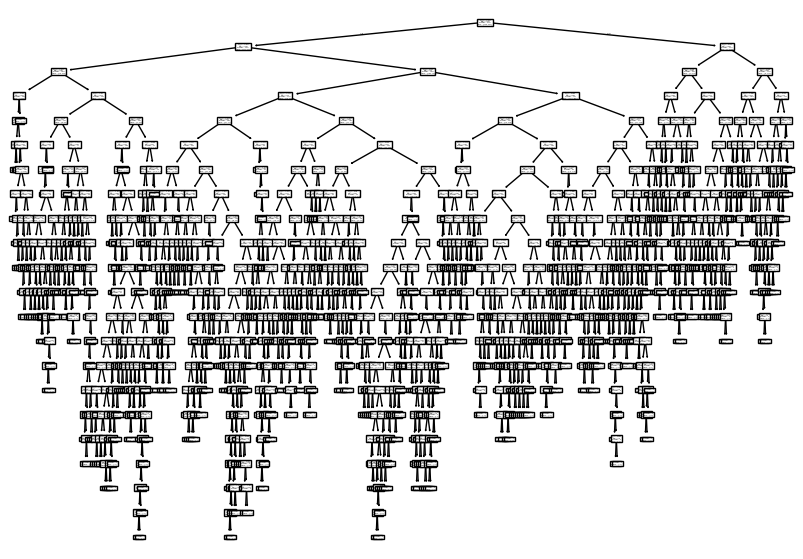

In [ ]:
#plot_tree()
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

* 루트노드 : 맨 위의 노드
* 리프노드 : 맨 아래 끝에 달린 노드
<br>

- max_depth : 깊이 제한 출력 매개변수
  - 1로 주면 루트 노드르 ㄹ제외하고 하나의 노드를 더 확장하여 그림
- filled : 클래스에 맞게 색을 칠해주는 매개변수
- feature_names : 특성의 이름을 전달해주는 매개변수


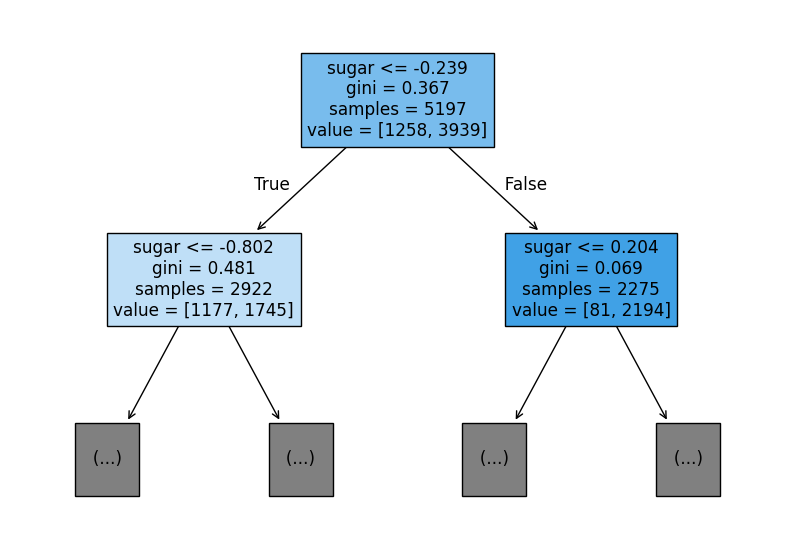

In [ ]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

<노드>
- 테스트조건 : sugar
- 불순도 : gini
- 총 샘플 수 :samples
- 클래스별 샘플 수 : values

<가지_branch>
- 조건만족 : True
- 조건 불만족 : False

###불순도 : gini
* 지니불순도 = 1 - (음성클래스 비율**2 + 양성클래스 비율**2)
* DecisionTreeClassifier클래스의 criterion매개변수 기본값 : gini
* criterion 매개변수에서 지정한 지니 불순도로 노드기준 정함
* 순수 노드: 지니 불순도가 0일 때

<br>

* 엔트로피 불순도 : 밑이 2인 로그를 사용한 곱(지니:제곱)
- 음성클래스 비율 * log2(음성 클래스비율) - 양성클래스비율 * log2(양성클래스비율)

<br>

###정보이득 : 부모와 자식 노드 사이의 불순도 차이
- 부모불순도 -  (왼쪽노드샘플수/부모샘플수) * 왼쪽노드불순도 - (오른쪽노드샘플수/부모샘플수) * 오른쪽노드불순도
- 결정트리 모델은 부모노드와 자식노드의 불순도 차이가 가능한 크도록 트리를 성장시킴

<br>

###가지치기
: 결정트리(Decision Tree)가 너무 복잡하게 자라서 과적합(Overfitting)되는 것을 막기 위해 쓸모없는 가지(불필요한 분기)를 잘라내는 과정.





In [ ]:
#가지치기
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


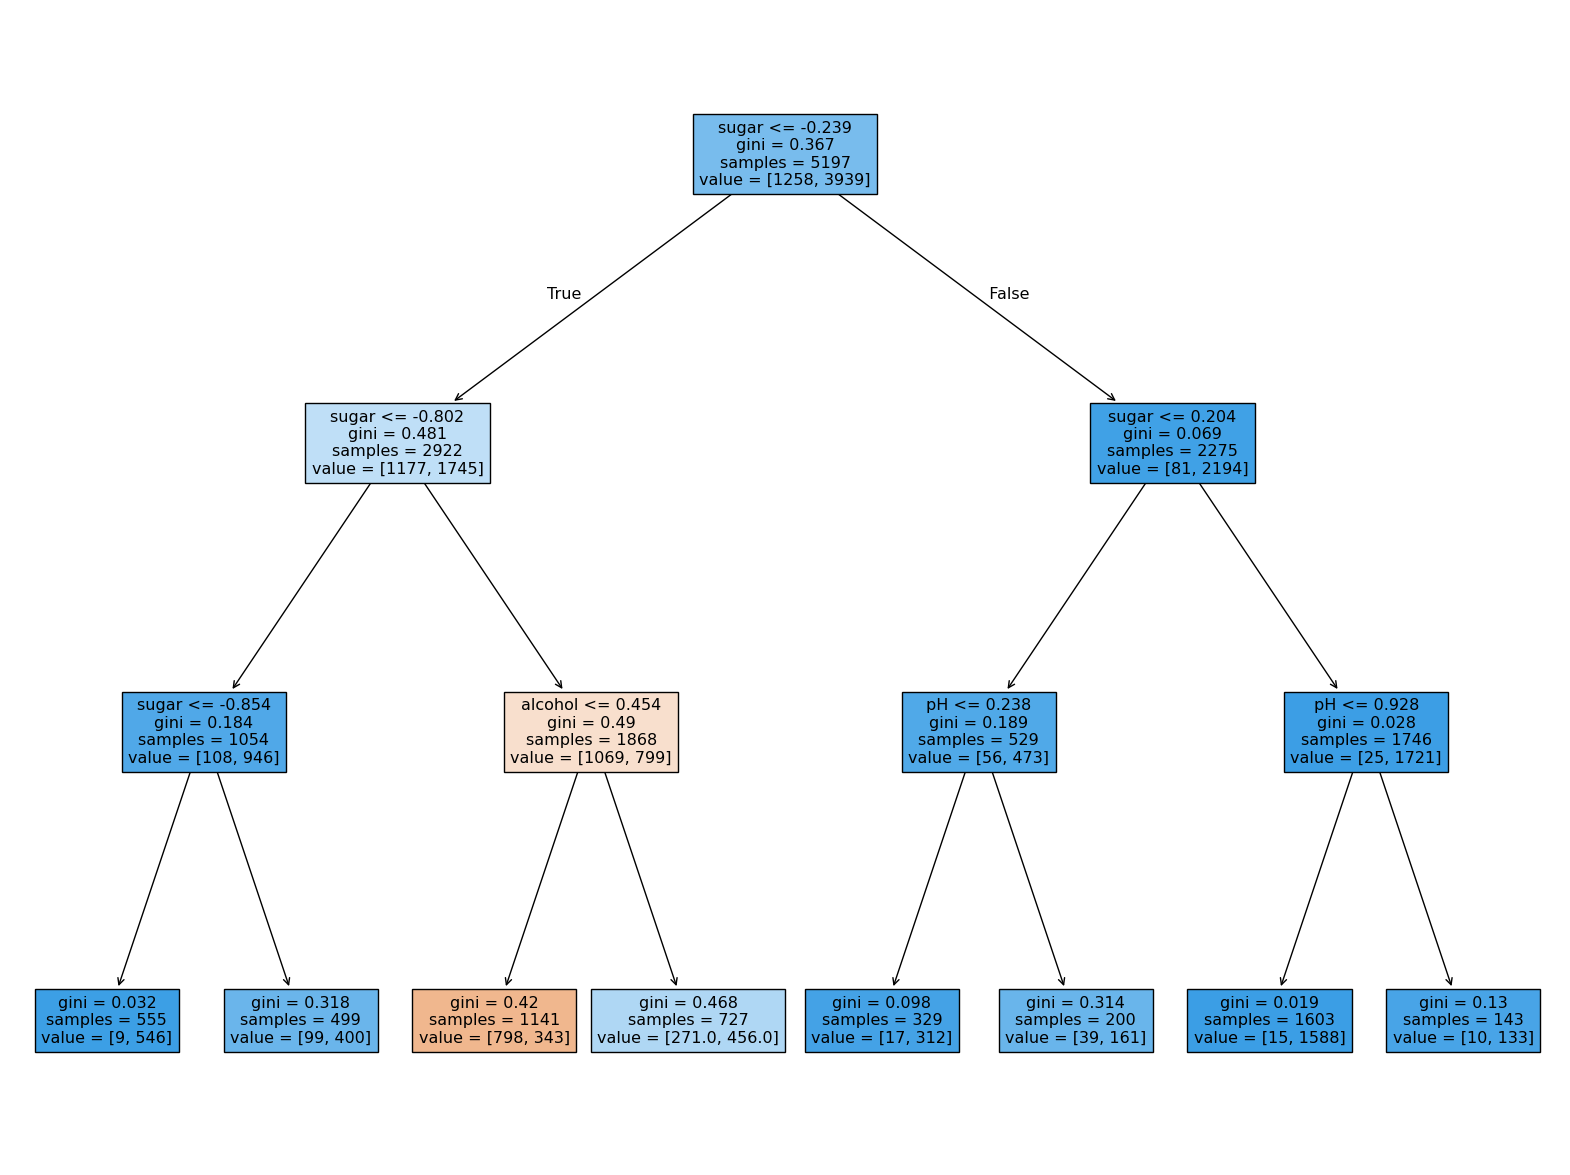

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

* depth 1 : sugar기준으로 훈련세트 분할
* depth 2 : 맨 왼쪽 노드만 당도 기준 / 왼쪽에서 두번째 노드는 alcohol기준으로 분할 / 오른쪽 두 노드는 pH 사용
* depth 3 (리프노드) : 왼쪽에서 세번째에 있는 노드만 음성클래스가 더 많음 _ 레드와인

=> 레드와인 <br>
-0.239<= sugar <= -0.802<br>
    alcohol : < 0.454



* 특성값의 스케일은 결정트리 알고리즘에 영향을 미치지 않으므로 표준화 전처리를 할 필요 없음

In [ ]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


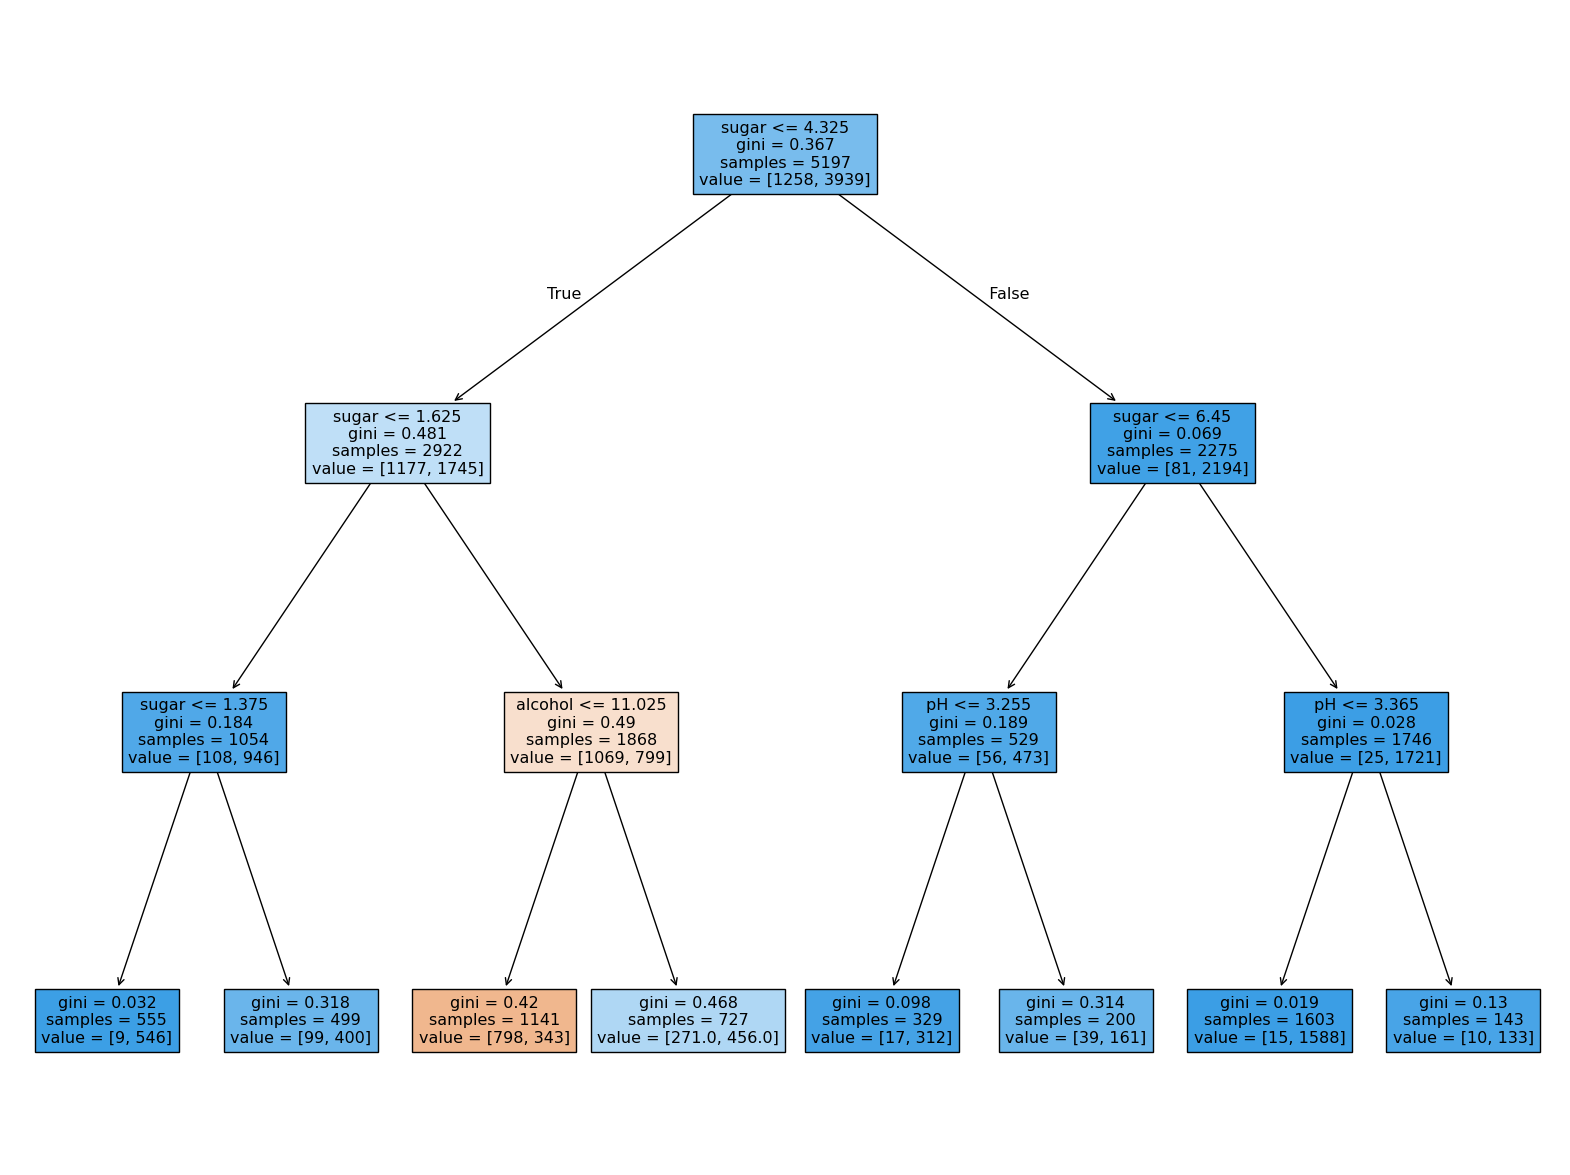

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

###특성중요도
: 각 노드의 정보 이득과 전체 샘플에 대한 비율을 곱한 후 특성별로 더하여 계산
* 값을 모두 더하면 1
* 특성 선택에 활용가능


In [ ]:
#특성중요도 feature_importances_
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


< 함수 리마인드 > <br>
 pandas
  - info() : 데이터프레임의 요약된 정보출력
  - describe() : 데이터프레임 열의 통계값 제공
    - percentiles : 백분위수 지정 매개변수 ( 기본값 : 0.25, 0.5, 0.75 )
  
  scikit-learn
  - DecisionTreeClassifier : 결정트리 분류 클래스
    - criterion : 불순도 지정 매개변수 ( 기본값 : gini / + entropy 지정도 가능)
    - splitter : 노드를 분할하는 전략 선택하는 매개변수 ( 기본값 : best _ 정보이득 최대 / + random : 임의 노드분할 )
    - max_depth : 트리가 성장할 최대 깊이 지정 ( 기본값 : None )
    - min_samples_split :  노드를 나누기 위한 최소 샘플 개수 ( 기본값 : 2 )
    - max_features : 최적의 분할을 위해 탐색할 특성의 개수 지정하는 매개변수 ( 기본값 : None )
  - plot_tree() : 결정트리모델 시각화
    - max_depth: 트리의 깊이 지정 ( 기본값 : None - 모든 노드 출력 )
    - feature_names : 특성의 이름 지정 매개변수
    - filled : True로 지정하면 타깃값에 따라 노드 안 색 채움

In [ ]:
#확인문제 4
#매개변수 값 0.0005로 지정하고 결정트리 만들어보기
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8874350586877044
0.8615384615384616


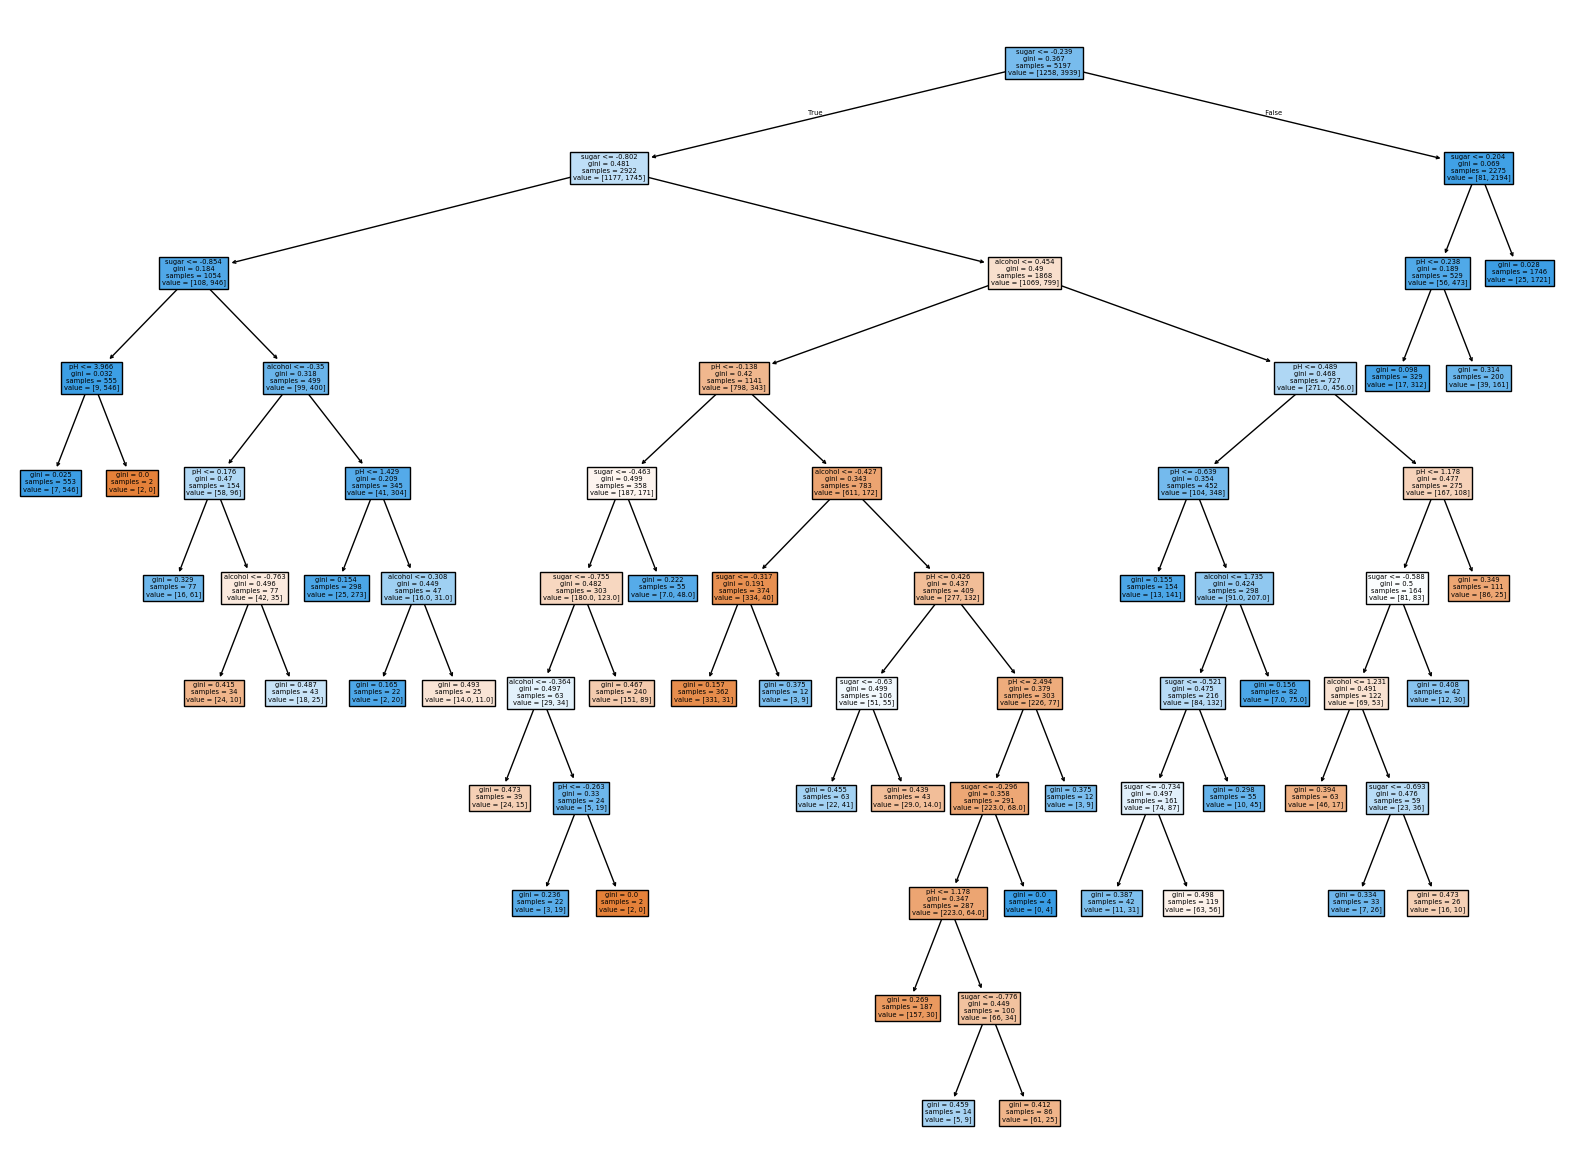

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()